# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
#verificacao de tipos numericos e inteiros

sinasc_raw.select_dtypes(include=['int64', 'float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ORIGEM      27028 non-null  int64  
 1   CODESTAB    26913 non-null  float64
 2   CODMUNNASC  27028 non-null  int64  
 3   LOCNASC     27028 non-null  int64  
 4   IDADEMAE    27028 non-null  int64  
 5   ESTCIVMAE   26711 non-null  float64
 6   CODOCUPMAE  24121 non-null  float64
 7   QTDFILVIVO  25455 non-null  float64
 8   QTDFILMORT  24930 non-null  float64
 9   CODMUNRES   27028 non-null  int64  
 10  CONSULTAS   27028 non-null  int64  
 11  HORANASC    27007 non-null  float64
 12  APGAR1      26932 non-null  float64
 13  APGAR5      26925 non-null  float64
 14  PESO        27028 non-null  int64  
 15  IDANOMAL    26437 non-null  float64
 16  NUMEROLOTE  27028 non-null  int64  
 17  DIFDATA     27028 non-null  int64  
 18  DTRECORIGA  0 non-null      float64
 19  NATURALMAE  26730 non-nul

In [4]:
sinasc2 = sinasc_raw.copy()

In [5]:
# dados complementares dos municipios de RO por regiao e com os indices (IDH, IFDM e PIB)

dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))

In [6]:
dados_ro

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830
5,Buritis,Ariquemes,0.616,0.6199,726000
6,Cabixi,Vilhena,0.650,0.5887,113031
7,Cacaulândia,Ariquemes,0.646,0.5721,116635
8,Cacoal,Cacoal,0.718,0.7111,2261644
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
sinasc2['munResLat'].describe()

#pensando em uma variacao de base, acho interessante utilizar uma forma de separacao do minino e maximo de forma automatica para obter o divisor de 10.5.. 

# mínimo e máximo de munResLat
min_value = sinasc2['munResLat'].min()
max_value = sinasc2['munResLat'].max()

#definindo bins

bins_latitude = [min_value, -10.5, max_value]

sinasc2['latitude'] = pd.cut(sinasc2['munResLat'], bins_latitude)
# Funções de agregação com nomes em inglês (melhoria de visualizacao no groupby) - nao consegui utilizar dentro do groupby
agregacoes = {
    'sum': ('soma', 'sum'),
    'mean': ('média', 'mean'),
    'min': ('mínimo', 'min'),
    'max': ('máximo', 'max'),
    'median': ('mediana', 'median'),
    'std': ('desvio padrão', 'std'),
    'var': ('variância', 'var')
}


In [8]:
#vamos utilizar as variaveis numericas QTDGESTANT e QTDPARTNOR

#sinasc2.groupby(latitude).agg('sum', 'mean', 'min', 'max', 'median', 'std', 'var')
#sinasc2.pivot_table(values = ['QTDPARTNOR', 'QTDGESTANT'], 
 #                   index = []
  #                  aggfunc = [sum, np.mean, min, max, np.median, 'std', 'var']
   #                )

#utilizando groupby
sinasc2.groupby('latitude').agg({
    'QTDGESTANT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

QTDGESTANT                                                  \
                       sum      mean  min   max median       std       var   
latitude                                                                     
(-13.5, -10.5]     15219.0  1.187037  0.0  15.0    1.0  1.305499  1.704328   
(-10.5, -8.769]    17615.0  1.364024  0.0  52.0    1.0  1.492482  2.227501   

                QTDPARTNOR                                                  
                       sum      mean  min   max median       std       var  
latitude                                                                    
(-13.5, -10.5]      5782.0  0.453668  0.0  41.0    0.0  1.125619  1.267019  
(-10.5, -8.769]     8771.0  0.711759  0.0  40.0    0.0  1.279042  1.635949

In [9]:
latitude = pd.cut(sinasc2['munResLat'], bins_latitude)


In [10]:
#utilizando pivot_tabel


sinasc2.pivot_table(values = ['QTDPARTNOR', 'QTDGESTANT'], 
                    index = [latitude],
                    aggfunc = [sum, np.mean, min, max, np.median, 'std', 'var']
                   )

sum                  mean                   min  \
                QTDGESTANT QTDPARTNOR QTDGESTANT QTDPARTNOR QTDGESTANT   
munResLat                                                                
(-13.5, -10.5]     15219.0     5782.0   1.187037   0.453668        0.0   
(-10.5, -8.769]    17615.0     8771.0   1.364024   0.711759        0.0   

                                  max                median             \
                QTDPARTNOR QTDGESTANT QTDPARTNOR QTDGESTANT QTDPARTNOR   
munResLat                                                                
(-13.5, -10.5]         0.0       15.0       41.0        1.0        0.0   
(-10.5, -8.769]        0.0       52.0       40.0        1.0        0.0   

                       std                   var             
                QTDGESTANT QTDPARTNOR QTDGESTANT QTDPARTNOR  
munResLat                                                    
(-13.5, -10.5]    1.305499   1.125619   1.704328   1.267019  
(-10.5, -8.769]   1.492482   1.279042   2.227501   1.635949

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [11]:
#vamos usar as variaveis CONSULTAS e QTDPARTCES
sinasc2['munResArea'].describe()

# mínimo e máximo de munResArea
min_value = sinasc2['munResArea'].min()
max_value = sinasc2['munResArea'].max()

#definindo bins

bins_area = [min_value, 3000, max_value]

sinasc2['area'] = pd.cut(sinasc2['munResArea'], bins_area)

area = pd.cut(sinasc2['munResArea'], bins_area)


In [12]:
#utilizando groupby

sinasc2.groupby('area').agg({
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDPARTCES': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

CONSULTAS                                               \
                          sum      mean min max median       std       var   
area                                                                         
(459.978, 3000.0]       19272  3.738506   1   9    4.0  0.608679  0.370490   
(3000.0, 34096.394]     77142  3.537326   1   9    4.0  0.820967  0.673986   

                    QTDPARTCES                                                  
                           sum      mean  min   max median       std       var  
area                                                                            
(459.978, 3000.0]       2910.0  0.571934  0.0   5.0    0.0  0.748719  0.560580  
(3000.0, 34096.394]    10184.0  0.507070  0.0  12.0    0.0  0.744981  0.554997

In [13]:
#utilizando pivot_table

sinasc2.pivot_table(values= ['CONSULTAS', 'QTDPARTCES'],
                    index= [area],
                    aggfunc= [sum, np.mean, min, max, np.median, 'std', 'var']
                    )


sum                 mean                  min  \
                    CONSULTAS QTDPARTCES CONSULTAS QTDPARTCES CONSULTAS   
munResArea                                                                
(459.978, 3000.0]       19272     2910.0  3.738506   0.571934         1   
(3000.0, 34096.394]     77142    10184.0  3.537326   0.507070         1   

                                     max               median             \
                    QTDPARTCES CONSULTAS QTDPARTCES CONSULTAS QTDPARTCES   
munResArea                                                                 
(459.978, 3000.0]          0.0         9        5.0         4        0.0   
(3000.0, 34096.394]        0.0         9       12.0         4        0.0   

                          std                  var             
                    CONSULTAS QTDPARTCES CONSULTAS QTDPARTCES  
munResArea                                                     
(459.978, 3000.0]    0.608679   0.748719  0.370490   0.560580  
(3000.0, 34096.394]  0.820967   0.744981  0.673986   0.554997

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [14]:
#vamos usar SEMAGESTAC e QTDPARTNOR (acho que seria interessante identificar qual e a melhor ou maior quantidade de parto normal por periodo de gestacao)

sinasc2['munResAlt'].describe()

sinasc2['altitude'] = pd.qcut(sinasc2['munResAlt'], 2)
altitude = pd.qcut(sinasc2['munResAlt'], 2)

altitude

0        (153.0, 595.0]
1        (153.0, 595.0]
2        (153.0, 595.0]
3        (153.0, 595.0]
4        (153.0, 595.0]
              ...      
27023    (153.0, 595.0]
27024    (153.0, 595.0]
27025    (153.0, 595.0]
27026    (153.0, 595.0]
27027    (153.0, 595.0]
Name: munResAlt, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(84.999, 153.0] < (153.0, 595.0]]

In [15]:
#utilizando groupby

sinasc2.groupby('altitude').agg({
    'SEMAGESTAC': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

SEMAGESTAC                                                    \
                       sum       mean   min   max median       std       var   
altitude                                                                       
(84.999, 153.0]   493526.0  38.568771  21.0  45.0   39.0  2.093561  4.383000   
(153.0, 595.0]    501090.0  38.566151  19.0  45.0   39.0  1.938267  3.756881   

                QTDPARTNOR                                                  
                       sum      mean  min   max median       std       var  
altitude                                                                    
(84.999, 153.0]     9307.0  0.780527  0.0  40.0    0.0  1.362645  1.856801  
(153.0, 595.0]      5264.0  0.398064  0.0  41.0    0.0  1.018270  1.036874

In [16]:
#utilizando pivot_table

sinasc2.pivot_table(values= ['SEMAGESTAC', 'QTDPARTNOR'],
                    index= [altitude],
                    aggfunc= [sum, np.mean, min, max, np.median, 'std', 'var']
                    )

sum                  mean                   min  \
                QTDPARTNOR SEMAGESTAC QTDPARTNOR SEMAGESTAC QTDPARTNOR   
munResAlt                                                                
(84.999, 153.0]     9307.0   493526.0   0.780527  38.568771        0.0   
(153.0, 595.0]      5264.0   501090.0   0.398064  38.566151        0.0   

                                  max                median             \
                SEMAGESTAC QTDPARTNOR SEMAGESTAC QTDPARTNOR SEMAGESTAC   
munResAlt                                                                
(84.999, 153.0]       21.0       40.0       45.0        0.0       39.0   
(153.0, 595.0]        19.0       41.0       45.0        0.0       39.0   

                       std                   var             
                QTDPARTNOR SEMAGESTAC QTDPARTNOR SEMAGESTAC  
munResAlt                                                    
(84.999, 153.0]   1.362645   2.093561   1.856801   4.383000  
(153.0, 595.0]    1.018270   1.938267   1.036874   3.756881

Correlação entre SEMAGESTAC e QTDPARTNOR: 0.0141954523526851


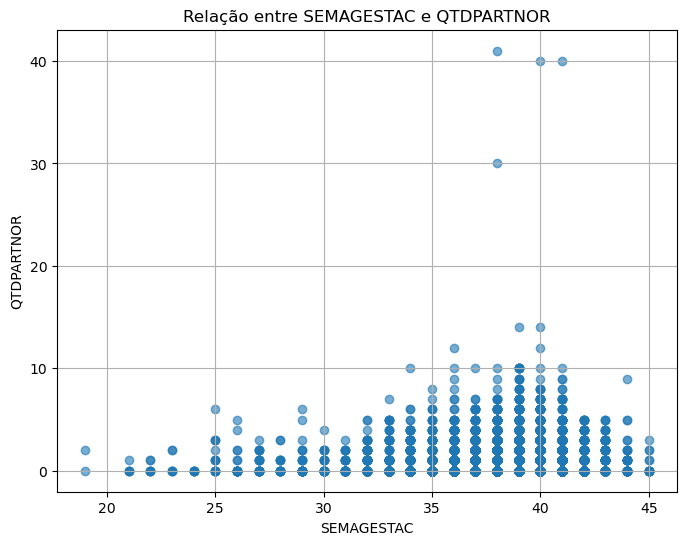

<Figure size 640x480 with 0 Axes>

In [17]:
#verificando se ha correlacao entre as variaveis

# correlação entre SEMAGESTAC e QTDPARTNOR
correlacao = sinasc2['SEMAGESTAC'].corr(sinasc2['QTDPARTNOR'])
print(f"Correlação entre SEMAGESTAC e QTDPARTNOR: {correlacao}")

# visualizacao do grafico
plt.figure(figsize=(8, 6))
plt.scatter(sinasc2['SEMAGESTAC'], sinasc2['QTDPARTNOR'], alpha=0.6)
plt.title('Relação entre SEMAGESTAC e QTDPARTNOR')
plt.xlabel('SEMAGESTAC')
plt.ylabel('QTDPARTNOR')
plt.grid(True)
plt.show()

# download PNG
plt.savefig('scatter_plot_SEMAGESTAC_QTDPARTNOR.png', dpi=300, bbox_inches='tight')

# analise conjunta com pairplot #todas as variaveis numericas
#sns.pairplot(sinasc2)
#plt.suptitle('Análise Conjunta de Variáveis')
#plt.show()

In [18]:
#e possivel visualizar que a quantidade de parto normal tem um pico entre 38 e 41 semanas de gestacao com uma leve tendencia de aumento ao longo do tempo.

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [19]:
sinasc_mun = sinasc2.set_index('munResNome')


In [20]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [21]:
sinasc_mun.groupby(imediatas)['IDADEMAE'].mean()

munResNome
Ariquemes      25.459635
Cacoal         26.347817
Jaru           25.708853
Ji-Paraná      26.094720
Porto Velho    26.166303
Vilhena        26.417143
Name: IDADEMAE, dtype: float64

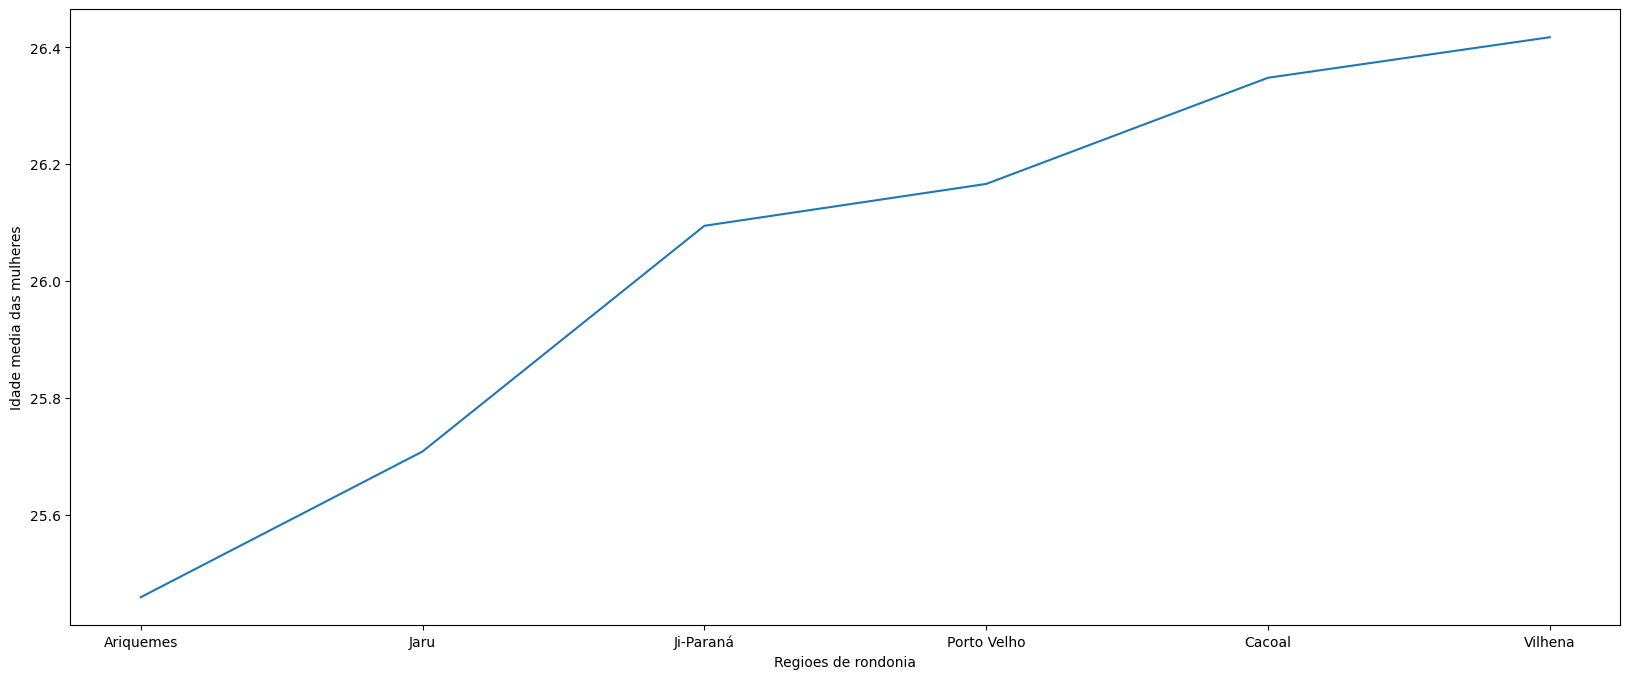

In [22]:
sinasc_mun.groupby(imediatas)['IDADEMAE'].mean().sort_values().plot(figsize = [20,8])

plt.ylabel('Idade media das mulheres')
plt.xlabel('Regioes de rondonia')

plt.savefig('plot_IDADEMAE_regioes.png', dpi=300, bbox_inches='tight')


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [23]:
dados_ro2 = dados_ro.copy()

In [24]:
# Definindo os bins e os rótulos correspondentes
bins = [0, 0.499, 0.599, 0.699, 0.799, 1.0]
labels = ['IDH muito baixo (0.000 – 0.499)',
          'IDH baixo (0.500 – 0.599)',
          'IDH médio (0.600 – 0.699)',
          'IDH alto (0.700 – 0.799)',
          'IDH muito alto (0.800 – 1.000)']

# Criando uma nova coluna 'idh_categoria' com base nos bins e labels
dados_ro2['idh_categoria'] = pd.cut(dados_ro['idh'], bins=bins, labels=labels, include_lowest=True)

dados_ro2

,municipio,regiao,idh,ifdm,pib,idh_categoria
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,IDH médio (0.600 – 0.699)
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,IDH baixo (0.500 – 0.599)
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,IDH médio (0.600 – 0.699)
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,IDH médio (0.600 – 0.699)
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,IDH alto (0.700 – 0.799)
5,Buritis,Ariquemes,0.616,0.6199,726000,IDH médio (0.600 – 0.699)
6,Cabixi,Vilhena,0.650,0.5887,113031,IDH médio (0.600 – 0.699)
7,Cacaulândia,Ariquemes,0.646,0.5721,116635,IDH médio (0.600 – 0.699)
8,Cacoal,Cacoal,0.718,0.7111,2261644,IDH alto (0.700 – 0.799)
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821,IDH baixo (0.500 – 0.599)


In [25]:
#escolhida a variavel CONSULTAS para verificar se o desenvolvimento humano impacta no acompanhamento (consultas realizadas) durante a gestacao.
mapping_idh = dict(zip(dados_ro2['municipio'], dados_ro2['idh_categoria'])) #mapping com dicionario

sinasc_mun.groupby(mapping_idh)['CONSULTAS'].count().sort_values()

munResNome
IDH baixo (0.500 – 0.599)     1826
IDH médio (0.600 – 0.699)     8346
IDH alto (0.700 – 0.799)     16855
Name: CONSULTAS, dtype: int64

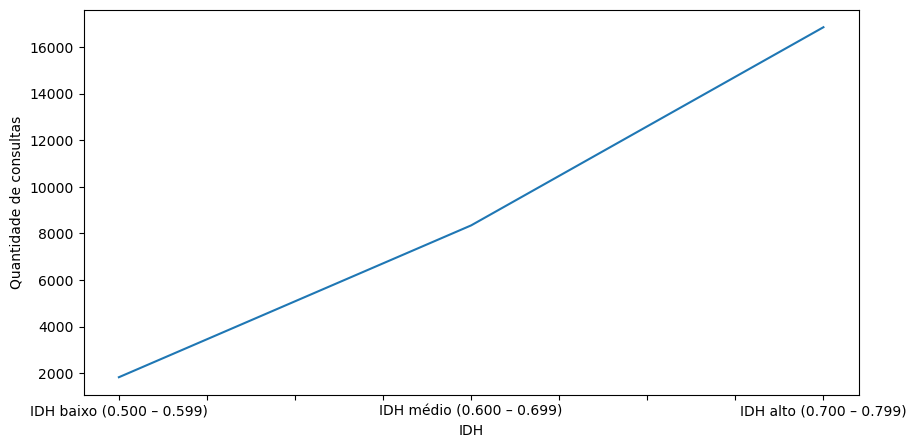

In [26]:
sinasc_mun.groupby(mapping_idh)['CONSULTAS'].count().sort_values().plot(figsize= [10,5])

plt.ylabel('Quantidade de consultas')
plt.xlabel('IDH')

plt.savefig('plot_IDH_CONSULTAS.png', dpi=300, bbox_inches='tight')


In [27]:
#vimos um aumento significativo no total de consultas para o IDH ALTO, cerca de 62% (16855)

perc_idh = (16855 / (1826 + 8346 + 16855)) * 100
perc_idh

62.363562363562366

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [28]:
# Definindo os bins e os rótulos correspondentes para o IFDM
bins_ifdm = [0, 0.4, 0.6, 0.8, 1]
labels_ifdm = ['Desenvolvimento Baixo (0.0 – 0.4)',
               'Desenvolvimento Regular (0.4 – 0.6)',
               'Desenvolvimento Moderado (0.6 – 0.8)',
               'Desenvolvimento Alto (0.8 – 1.0)']

# Criando uma nova coluna 'ifdm_categoria' com base nos bins e labels
dados_ro2['ifdm_categoria'] = pd.cut(dados_ro['ifdm'], bins=bins_ifdm, labels=labels_ifdm, include_lowest=True)

dados_ro2

,municipio,regiao,idh,ifdm,pib,idh_categoria,ifdm_categoria
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,IDH médio (0.600 – 0.699),Desenvolvimento Moderado (0.6 – 0.8)
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,IDH baixo (0.500 – 0.599),Desenvolvimento Regular (0.4 – 0.6)
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,IDH médio (0.600 – 0.699),Desenvolvimento Regular (0.4 – 0.6)
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,IDH médio (0.600 – 0.699),Desenvolvimento Regular (0.4 – 0.6)
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,IDH alto (0.700 – 0.799),Desenvolvimento Moderado (0.6 – 0.8)
5,Buritis,Ariquemes,0.616,0.6199,726000,IDH médio (0.600 – 0.699),Desenvolvimento Moderado (0.6 – 0.8)
6,Cabixi,Vilhena,0.650,0.5887,113031,IDH médio (0.600 – 0.699),Desenvolvimento Regular (0.4 – 0.6)
7,Cacaulândia,Ariquemes,0.646,0.5721,116635,IDH médio (0.600 – 0.699),Desenvolvimento Regular (0.4 – 0.6)
8,Cacoal,Cacoal,0.718,0.7111,2261644,IDH alto (0.700 – 0.799),Desenvolvimento Moderado (0.6 – 0.8)
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821,IDH baixo (0.500 – 0.599),Desenvolvimento Regular (0.4 – 0.6)


In [29]:
mapping_ifdm = dict(zip(dados_ro2['municipio'], dados_ro2['ifdm_categoria'])) #mapping com dicionario

sinasc_mun.groupby(mapping_ifdm)['CONSULTAS'].count().sort_values()

munResNome
Desenvolvimento Regular (0.4 – 0.6)      5081
Desenvolvimento Moderado (0.6 – 0.8)    21946
Name: CONSULTAS, dtype: int64

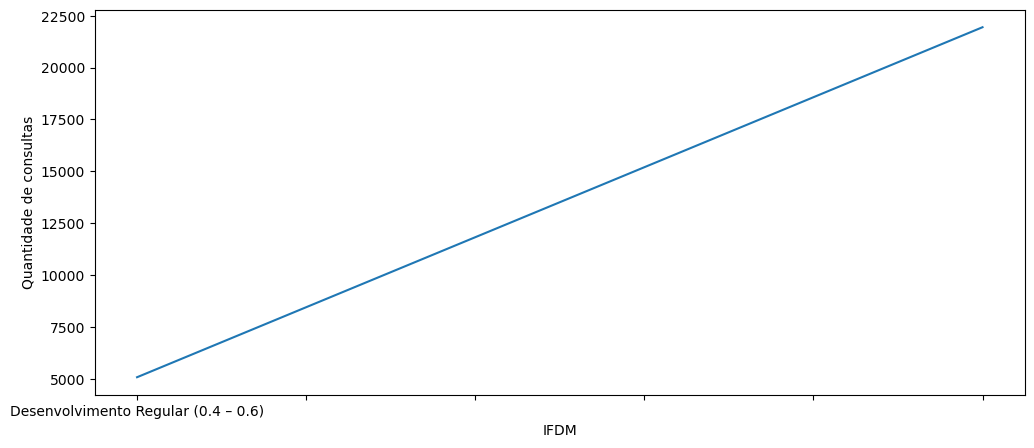

In [30]:
sinasc_mun.groupby(mapping_ifdm)['CONSULTAS'].count().sort_values().plot(figsize= [12,5])

plt.ylabel('Quantidade de consultas')
plt.xlabel('IFDM')

plt.savefig('plot_IFDM_CONSULTAS.png', dpi=300, bbox_inches='tight')


In [31]:
#tambem e perceptivel um aumento na quantidade de consultas do IFDM Moderado para o regular (cerca de 81%)

perc_ifdm = (21946 / (5081 + 21946)) * 100
perc_ifdm

81.2002812002812

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [32]:
# Verificando os valores únicos na coluna 'pib'
#print(dados_ro2['pib'].unique())

# Definindo os bins e os rótulos correspondentes para o PIB
#bins_pib = [0, 100000000, 200000000, 300000000, 500000000, 1000000000, float('inf')]
#labels_pib = ['Até 100 Milhões',
#              'Acima de 100 Milhões',
#              'Acima de 200 Milhões',
#              'Acima de 300 Milhões',
#              'Acima de 500 Milhões',
#              'Acima de 1 Bilhão']

# Criando uma nova coluna 'pib_categoria' com base nos bins e labels
#dados_ro2['pib_categoria'] = pd.cut(dados_ro2['pib'], bins=bins_pib, labels=labels_pib, include_lowest=True)
#dados_ro2['pib_categoria'].value_counts()

In [33]:
#feito manualmente pois nao consegui encaixar no metodo de bins e labels dos exercicios anteriores.
mapping_pib = {'Porto Velho': 'Acima de 1 Bilhão', 'Ji-Paraná': 'Acima de 1 Bilhão', 'Vilhena': 'Acima de 1 Bilhão', 'Ariquemes': 'Acima de 1 Bilhão', 'Cacoal': 'Acima de 1 Bilhão', 'Jaru': 'Acima de 1 Bilhão', 'Rolim de Moura': 'Acima de 1 Bilhão', 'Pimenta Bueno': 'Acima de 1 Bilhão', 'Guajará-Mirim': 'Acima de 500 Milhões', 'Ouro Preto do Oeste': 'Acima de 500 Milhões', 'Buritis': 'Acima de 500 Milhões', 'Machadinho d''Oeste': 'Acima de 500 Milhões', 'Espigão d''Oeste': 'Acima de 500 Milhões', 'São Miguel do Guaporé': 'Acima de 500 Milhões', 'Candeias do Jamari': 'Acima de 500 Milhões', 'Nova Mamoré': 'Acima de 500 Milhões', 'Cerejeiras': 'Acima de 500 Milhões', 'Alta Floresta d''Oeste': 'Acima de 300 Milhões', 'Presidente Médici': 'Acima de 300 Milhões', 'Cujubim': 'Acima de 300 Milhões', 'Nova Brasilândia d''Oeste': 'Acima de 300 Milhões', 'Alto Paraíso': 'Acima de 300 Milhões', 'São Francisco do Guaporé': 'Acima de 300 Milhões', 'Colorado do Oeste': 'Acima de 300 Milhões', 'Monte Negro': 'Acima de 200 Milhões', 'Alto Alegre dos Parecis': 'Acima de 200 Milhões', 'Campo Novo de Rondônia': 'Acima de 200 Milhões', 'Alvorada d''Oeste': 'Acima de 200 Milhões', 'Chupinguaia': 'Acima de 100 Milhões', 'Corumbiara': 'Acima de 100 Milhões', 'Ministro Andreazza': 'Acima de 100 Milhões', 'Urupá': 'Acima de 100 Milhões', 'Costa Marques': 'Acima de 100 Milhões', 'Seringueiras': 'Acima de 100 Milhões', 'Mirante da Serra': 'Acima de 100 Milhões', 'Governador Jorge Teixeira': 'Acima de 100 Milhões', 'Theobroma': 'Acima de 100 Milhões', 'Santa Luzia d''Oeste': 'Acima de 100 Milhões', 'Novo Horizonte do Oeste': 'Acima de 100 Milhões', 'Itapuã do Oeste': 'Acima de 100 Milhões', 'Vale do Paraíso': 'Acima de 100 Milhões', 'Cacaulândia': 'Acima de 100 Milhões', 'Cabixi': 'Acima de 100 Milhões', 'Vale do Anari': 'Acima de 100 Milhões', 'Nova União': 'Até 100 Milhões', 'Parecis': 'Até 100 Milhões', 'Rio Crespo': 'Até 100 Milhões', 'Pimenteiras do Oeste': 'Até 100 Milhões', 'Teixeirópolis': 'Até 100 Milhões', 'São Felipe d''Oeste': 'Até 100 Milhões', 'Castanheiras': 'Até 100 Milhões', 'Primavera de Rondônia': 'Até 100 Milhões'}

sinasc_mun.groupby(mapping_pib)['CONSULTAS'].count().sort_values()


munResNome
Até 100 Milhões           377
Acima de 200 Milhões      519
Acima de 300 Milhões     1252
Acima de 100 Milhões     1853
Acima de 500 Milhões     3354
Acima de 1 Bilhão       17736
Name: CONSULTAS, dtype: int64

In [34]:
#mapping_pib = dict(zip(dados_ro2['municipio'], dados_ro2['pib_categoria'])) #mapping com dicionario

#
# sinasc_mun.groupby(mapping_pib)['CONSULTAS'].count().sort_values()

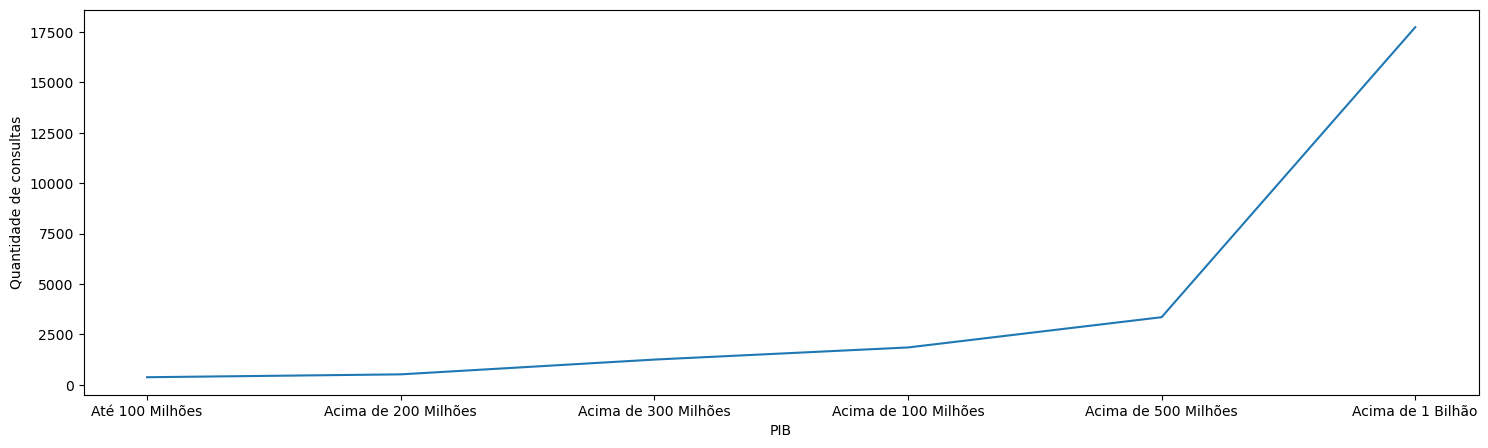

In [35]:
sinasc_mun.groupby(mapping_pib)['CONSULTAS'].count().sort_values().plot(figsize= [18,5])

plt.ylabel('Quantidade de consultas')
plt.xlabel('PIB')

plt.savefig('plot_PIB_CONSULTAS.png', dpi=300, bbox_inches='tight')


In [36]:
#e possivel visualizar tambem um aumento no total de consultas conforme o pib do municipio e maior, cerca de 70%.

perc_pib = (17736 / (377+519+1252+1853+3354+17736)) * 100
perc_pib

70.68670041050575

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Foi identificado que houve um aumento na quantidade de consultas realizadas utilizando as 3 chaves (IDM, IFDM e PIB):

**IDM**
- Cerca de 62% de aumento nas consultas para municípios com IDH ALTO.
  
  | Categoria                | Quantidade |
  |--------------------------|------------|
  | IDH baixo (0.500 – 0.599)| 1826       |
  | IDH médio (0.600 – 0.699)| 8346       |
  | IDH alto (0.700 – 0.799) | 16855      |

**IFDM**
- Cerca de 81% de aumento na quantidade de consultas do IFDM Moderado para o regular.
  
  | Categoria                         | Quantidade |
  |-----------------------------------|------------|
  | Desenvolvimento Regular (0.4 – 0.6)| 5081       |
  | Desenvolvimento Moderado (0.6 – 0.8)| 21946      |

**PIB**
- Cerca de 70% de aumento na quantidade de consultas para municípios com PIB acima de 1 bilhão.
  
  | Categoria               | Quantidade |
  |-------------------------|------------|
  | Até 100 Milhões         | 377        |
  | Acima de 200 Milhões    | 519        |
  | Acima de 300 Milhões    | 1252       |
  | Acima de 100 Milhões    | 1853       |
  | Acima de 500 Milhões    | 3354       |
  | Acima de 1 Bilhão       | 17736      |

Também foi possível visualizar que a quantidade de parto normal tem um pico entre 38 e 41 semanas de gestação com uma leve tendência de aumento ao longo do tempo.


